In [195]:
import pandas as pd

import numpy as np

file = './documents_of_type_presidential_document_and_of_presidential_document_type_executive_order.csv'

ex_dataset = pd.read_csv(file)

In [8]:
print(type(ex_dataset))
ex_dataset.head()

<class 'pandas.core.frame.DataFrame'>


citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  https://www.gpo.gov/fdsys/pkg/FR-2018-09-06/pd...  Presidential Document   

           subtype publication_date signing_date  start_page  \
0  Executive Order       11/29/2018   11/27/2018       61505   
1  Executive Order       11/02/2018   11/01/2018       55243   
2  Executive Order       09/21/2018   09/20/2018       48195   
3  Executive Order       09/14/2018   09/12/2018       46843   
4  Executive Order       09/06/2018   08/31/2018       45321   

                                               title  \
0  Blocking Property of Certain Persons Contribut...   
1  Blocking Property of Additional Persons Contri...   
2  Authorizing the Implementation of Certain Sanc...   
3  Imposing Certain Sanctions in the Event of For...   
4       Strengthening Retirement Security in America   

                                   disposition_notes  executive_order_number  
0                                                NaN                   13851  
1                                                NaN                   13850  
2  See: EO 13694 of 4/1/2015, EO 13757 of 12/28/2...                   13849  
3  See: 13694 of 4/1/2015, EO 13757 of 12/28/2016...                   13848  
4                                                NaN                   13847

Before we try and extract the text from the URLs, I want to create another column called "President" and one called "Party" so that we have those pre-labeled before we make any transformations. I can see online that orders 13765-13851 were signed by Trump, 13490-13764 were signed by Obama, 13199-13487 were signed by Bush and 12890-13197 were signed by Clinton. This will help us assign each order to the president that gave it.

In [198]:
def president(x):
    if x > 13764:
        return "Trump"
    elif x > 13490:
        return "Obama"
    elif x > 13199:
        return "Bush"
    else:
        return "Clinton"

In [200]:
ex_dataset["President"] = ex_dataset["executive_order_number"].apply(president)

print(ex_dataset.head())

        citation document_number  end_page  \
0    83 FR 61505      2018-26156     61507   
1    83 FR 55243      2018-24254     55245   
2    83 FR 48195      2018-20816     48200   
3    83 FR 46843      2018-20203     46848   
4    83 FR 45321      2018-19514     45323   
5    83 FR 38939      2018-17068     38949   
6    83 FR 35099      2018-15955     35103   
7    83 FR 33115      2018-15299     33117   
8    83 FR 32753      2018-15195     32754   
9    83 FR 32755      2018-15202     32758   
10   83 FR 29435      2018-13696     29436   
11   83 FR 29431      2018-13640     29434   
12   83 FR 25329      2018-11913     25334   
13   83 FR 25335      2018-11916     25340   
14   83 FR 25341      2018-11936     25342   
15   83 FR 25343      2018-11939     25347   
16   83 FR 24001      2018-11335     24002   
17   83 FR 23771      2018-11101     23774   
18   83 FR 23345      2018-10855     23348   
19   83 FR 22343      2018-10403     22345   
20   83 FR 20715      2018-09895  

Now we create the function that will add a col for the different political parties

In [203]:
def party(x):
    if x == "Trump":
        return "Republican"
    elif x == "Obama":
        return "Democrat"
    elif x == "Bush":
        return "Republican"
    else:
        return "Democrat"

In [206]:
ex_dataset["Party"] = ex_dataset["President"].apply(party)

print(ex_dataset.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Now we're going to test how to get the text from one URL, and once we get that working we can nest the code in a for loop and apply it to the whole dataset

In [87]:
test_url = ex_dataset.iloc[0][3]
print(test_url)

https://www.federalregister.gov/documents/2018/11/29/2018-26156/blocking-property-of-certain-persons-contributing-to-the-situation-in-nicaragua


In [39]:
from urllib.request import Request, urlopen


In [88]:
import urllib
req = urllib.request.Request(test_url, headers={'User-Agent' : "Magic Browser"}) 
con = urllib.request.urlopen( req )
html = con.read()
print(html)


b'<!DOCTYPE html>\n  <head>\n    <title>\n      Federal Register\n       :: \n      Blocking Property of Certain Persons Contributing to the Situation in Nicaragua\n    </title>\n\n    <!-- Tell search engines to use the proper hostname and protocol -->\n    <link href="https://www.federalregister.gov/documents/2018/11/29/2018-26156/blocking-property-of-certain-persons-contributing-to-the-situation-in-nicaragua" rel="canonical" />\n\n    <link rel="Shortcut Icon" href="/favicon.ico">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n    <script src="https://use.typekit.net/rgf3yox.js"></script>\n<script type="text/javascript">\n  try {\n    Typekit.load({\n      async: true,\n      active: function() {\n        $(\'body\').trigger(\'typekit-active\');\n      }\n    })\n  } catch(e) {}\n</script>\n\n\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="keywords" content="government federal register executive rulings notices

In [93]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html)

soup_text = soup.get_text()

print(soup_text)



      Federal Register
       :: 
      Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
    






  try {
    Typekit.load({
      async: true,
      active: function() {
        $('body').trigger('typekit-active');
      }
    })
  } catch(e) {}
























<div id="exit_modal">
  <a href="#" class="jqmClose">Close</a>
  <h3 class="title_bar">Notice</h3>

  <h4>You are now leaving the FederalRegister.gov website.</h4>

  <p>
    Click the link below to continue or wait 10 seconds to be
    transferred to:
  </p>

  <a href="http://www.flickr.com/" class="external_link flickr_link">
    http://www.flickr.com/
  </a>

  <p>
    You are linking to a photograph that is sourced from Flickr under
    a Creative Commons license. All photographs on FederalRegister.gov
    section pages are published with attribution to the photo owner, and
    are consistent with the terms of use specified by the photo owner.
    For more information on
    <a hr

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [90]:
print(soup.title)

<title>
      Federal Register
       :: 
      Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
    </title>


In [91]:
pretty_soup = soup.prettify()

print(pretty_soup)

<!DOCTYPE html>
<html>
 <head>
  <title>
   Federal Register
       :: 
      Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
  </title>
  <!-- Tell search engines to use the proper hostname and protocol -->
  <link href="https://www.federalregister.gov/documents/2018/11/29/2018-26156/blocking-property-of-certain-persons-contributing-to-the-situation-in-nicaragua" rel="canonical"/>
  <link href="/favicon.ico" rel="Shortcut Icon"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <script src="https://use.typekit.net/rgf3yox.js">
  </script>
  <script type="text/javascript">
   try {
    Typekit.load({
      async: true,
      active: function() {
        $('body').trigger('typekit-active');
      }
    })
  } catch(e) {}
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="government federal register executive rulings notices" name="keywords"/>
  <meta content="chrome=1" http-equiv=

In [92]:
print(type(pretty_soup))

<class 'str'>


Now I looked through the documents to try and find a phrase that all the executive orders started with. I will use this to split the document so we only get the text of the order, not all the HTML information. I chose "Use the PDF linked in the document sidebar for the official electronic format". It's long, but I has issues with short phrases appearing earlier in the text. Below, I do the same with the end of the order and the phrase "[FR Doc."

In [97]:
doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
print(doc1)



 61505
Executive Order 13851 of November 27, 2018
        Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
By the authority vested in me as President by the Constitution and the laws of the United States of America, including the International Emergency Economic Powers Act (50 U.S.C. 1701 et seq.) (IEEPA), the National Emergencies Act (50 U.S.C. 1601 et seq.) (NEA), section 212(f) of the Immigration and Nationality Act of 1952 (8 U.S.C. 1182(f)), and section 301 of title 3, United States Code,
I, DONALD J. TRUMP, President of the United States of America, find that the situation in Nicaragua, including the violent response by the Government of Nicaragua to the protests that began on April 18, 2018, and the Ortega regime's systematic dismantling and undermining of democratic institutions and the rule of law, its use of indiscriminate violence and repressive tactics against civilians, as well as its corruption leading to the destabilization of Nicaragua's e

In [102]:
a,b = doc1.split("[FR Doc.")

print(a)


 61505
Executive Order 13851 of November 27, 2018
        Blocking Property of Certain Persons Contributing to the Situation in Nicaragua
By the authority vested in me as President by the Constitution and the laws of the United States of America, including the International Emergency Economic Powers Act (50 U.S.C. 1701 et seq.) (IEEPA), the National Emergencies Act (50 U.S.C. 1601 et seq.) (NEA), section 212(f) of the Immigration and Nationality Act of 1952 (8 U.S.C. 1182(f)), and section 301 of title 3, United States Code,
I, DONALD J. TRUMP, President of the United States of America, find that the situation in Nicaragua, including the violent response by the Government of Nicaragua to the protests that began on April 18, 2018, and the Ortega regime's systematic dismantling and undermining of democratic institutions and the rule of law, its use of indiscriminate violence and repressive tactics against civilians, as well as its corruption leading to the destabilization of Nicaragua's e

In [104]:
ex_text = []

ex_text.append(a)

print(ex_text)


[" 61505\nExecutive Order 13851 of November 27, 2018\n        Blocking Property of Certain Persons Contributing to the Situation in Nicaragua\nBy the authority vested in me as President by the Constitution and the laws of the United States of America, including the International Emergency Economic Powers Act (50 U.S.C. 1701 et seq.) (IEEPA), the National Emergencies Act (50 U.S.C. 1601 et seq.) (NEA), section 212(f) of the Immigration and Nationality Act of 1952 (8 U.S.C. 1182(f)), and section 301 of title 3, United States Code,\nI, DONALD J. TRUMP, President of the United States of America, find that the situation in Nicaragua, including the violent response by the Government of Nicaragua to the protests that began on April 18, 2018, and the Ortega regime's systematic dismantling and undermining of democratic institutions and the rule of law, its use of indiscriminate violence and repressive tactics against civilians, as well as its corruption leading to the destabilization of Nicarag

In [110]:
orders_text = []

for entry in range(len(ex_dataset)):
    url = ex_dataset.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
    a,b = doc1.split("[FR Doc.")
    orders_text.append(a)
   

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


IndexError: list index out of range

Here we have an issue. I did some investigating and found out that not all the orders are avaliable in HTML format. The text of those documents just link to a flat file. I need to remove those documents. It will reduce the number of observances in our dataset, but there's no other way

In [209]:
exec_orders_len = len(ex_dataset)

print(exec_orders_len)

928


In [ ]:
# I'm going to look at each text and create a boolean to see whether the text contains the phrase "[FR Doc."

test_cleaning = []

for entry in range(0, 928):
    url = ex_dataset.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    test_cleaning.append(soup_text)
    



In [207]:
substring = "[FR Doc."

check = []

for entry in test_cleaning:
    if substring in entry:
        value = "Yes"
        check.append(value)
    else:
        value = "No"
        check.append(value)

print(check)

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',

In [211]:
ind = range(0, 928)
df = pd.DataFrame(index = ind, data = check, columns=["In_HTML"])

#print(df.head())

print(df[df["In_HTML"] == "No"])

    In_HTML
139      No
303      No
707      No
708      No
709      No
710      No
711      No
712      No
713      No
714      No
715      No
716      No
717      No
718      No
719      No
720      No
721      No
722      No
723      No
724      No
725      No
726      No
727      No
728      No
729      No
730      No
731      No
732      No
733      No
734      No
..      ...
898      No
899      No
900      No
901      No
902      No
903      No
904      No
905      No
906      No
907      No
908      No
909      No
910      No
911      No
912      No
913      No
914      No
915      No
916      No
917      No
918      No
919      No
920      No
921      No
922      No
923      No
924      No
925      No
926      No
927      No

[223 rows x 1 columns]


Okay, now we know which orders aren't in HTML format, and we can remove those. There are 223

In [213]:
ex_dataset["In_HTML"] = df["In_HTML"]

print(ex_dataset.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Okay, now we know which ones are in HTML. We can make a new dataset that contains only HTML orders, and work off that

In [215]:
cleaned_ex_data = ex_dataset[ex_dataset["In_HTML"] == "Yes"]

print(928-223)

# These number should be the same if the above code is successful
print(len(cleaned_ex_data))

705
705


Great! We now have 705 executive orders in HTML ready to be parsed into our dataframe.

In [218]:
exec_text = []

for entry in range(0, 705):
    url = cleaned_ex_data.iloc[entry][3]
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen( req )
    html = con.read()
    soup = BeautifulSoup(html)
    soup_text = soup.get_text()
    doc1 = soup_text.split("Use the PDF linked in the document sidebar for the official electronic format",1)[1]
    a,b = doc1.split("[FR Doc.")
    exec_text.append(a)

# I'm going to print a random order (100) to test that the for loop worked
print(exec_text[100])

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Next we're going to append this list of strings to our dataset to get our final result

In [221]:
cleaned_ex_data["Order_Text"] = exec_text

print(cleaned_ex_data.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Next, we're going to strip the new line \n from the text

In [235]:
for index, row in cleaned_ex_data.iterrows():
    cleaned_ex_data.loc[index, "Order_Text"] = cleaned_ex_data.loc[index, "Order_Text"].replace('\n', '')
    
print(cleaned_ex_data.head())

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

Now our data is clean and ready for analysis! Let's get some exploratory statistics, such as the number of orders per president

In [238]:
print("Trump:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Trump"]))
print("Obama:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Obama"]))
print("Bush:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Bush"]))
print("Clinton:",len(cleaned_ex_data[cleaned_ex_data["President"] == "Clinton"]))

Trump: 87
Obama: 272
Bush: 291
Clinton: 55


We can see that Clinton has the least. This is likely because we discarded many of the executive orders that were't in HTML format, which are the older orders. Trump also doesn't have very many, likely becuase he hasn't been in office very long. Now let's compare Dems and Republicans:

In [239]:
print("Democrats:",len(cleaned_ex_data[cleaned_ex_data["Party"] == "Democrat"]))
print("Republicans:",len(cleaned_ex_data[cleaned_ex_data["Party"] == "Republican"]))

Democrats: 327
Republicans: 378


These numbers are pretty close, which will be good for comparisons. Next let's add a col that contains the length of the different orders

In [247]:
lengths = []

for index, row in cleaned_ex_data.iterrows():
    num = len(cleaned_ex_data.loc[index, "Order_Text"])
    lengths.append(num)

# this looks good, now we just add this to the main dataframe   
print(lengths)


[8555, 8380, 18662, 17754, 7619, 40410, 13682, 6590, 3183, 9886, 4951, 10791, 19216, 20876, 4339, 14347, 4406, 10517, 9140, 6978, 8067, 11066, 5842, 12365, 4425, 9871, 19286, 7072, 5255, 4072, 5830, 1391, 3446, 6716, 10321, 3125, 12175, 2383, 7336, 5698, 2481, 14858, 1822, 5328, 23761, 7243, 5246, 2151, 8480, 1810, 11608, 5143, 20955, 4385, 4866, 2259, 5988, 11592, 3646, 4029, 6464, 7491, 4491, 8262, 4839, 4773, 2310, 5343, 15384, 1612, 4117, 39293, 3558, 9821, 7478, 8412, 3973, 2313, 3920, 3016, 17300, 6183, 18503, 4309, 15469, 13304, 3416, 52635, 2256, 3135, 6839, 4486, 2175, 10694, 5187, 2853, 3462, 3122, 15429, 2633, 19986, 5944, 5498, 11498, 17768, 11605, 1256, 5154, 15280, 4202, 11578, 3769, 2488, 2503, 2917, 3007, 3180, 3035, 4711, 9653, 9230, 2245, 14021, 9266, 8405, 9759, 6317, 1688, 3044, 10947, 10642, 3577, 11129, 8529, 12239, 18918, 3312, 16001, 2278, 3054, 2771, 3676, 7007, 6490, 12889, 2165, 6031, 11698, 11851, 5907, 2434, 4039, 10951, 1021, 2706, 2303, 8763, 48997, 10990

In [248]:
cleaned_ex_data["Order_Length"] = lengths

print(cleaned_ex_data.head())

      citation document_number  end_page  \
0  83 FR 61505      2018-26156     61507   
1  83 FR 55243      2018-24254     55245   
2  83 FR 48195      2018-20816     48200   
3  83 FR 46843      2018-20203     46848   
4  83 FR 45321      2018-19514     45323   

                                            html_url  \
0  https://www.federalregister.gov/documents/2018...   
1  https://www.federalregister.gov/documents/2018...   
2  https://www.federalregister.gov/documents/2018...   
3  https://www.federalregister.gov/documents/2018...   
4  https://www.federalregister.gov/documents/2018...   

                                             pdf_url                   type  \
0  https://www.gpo.gov/fdsys/pkg/FR-2018-11-29/pd...  Presidential Document   
1  https://www.gpo.gov/fdsys/pkg/FR-2018-11-02/pd...  Presidential Document   
2  https://www.gpo.gov/fdsys/pkg/FR-2018-09-21/pd...  Presidential Document   
3  https://www.gpo.gov/fdsys/pkg/FR-2018-09-14/pd...  Presidential Document   
4  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now let's compare the average length of each executive order across parties

In [255]:
import numpy as np

dems = cleaned_ex_data[cleaned_ex_data["Party"] == "Democrat"]
reps = cleaned_ex_data[cleaned_ex_data["Party"] == "Republican"]

print("Democrats:", np.mean(dems["Order_Length"]))
print("Republicans:", np.mean(reps["Order_Length"]))


Democrats: 7998.868501529052
Republicans: 6545.5661375661375


Now let's compare these two groups with some boxplots

(0, 21000)

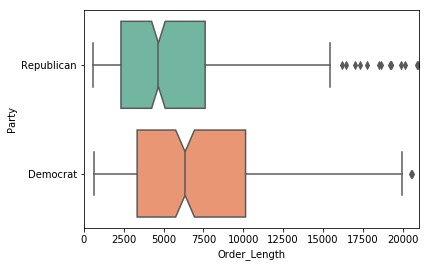

In [254]:
import seaborn as sns

import matplotlib.pyplot as plt

len_box_adj = sns.boxplot(x="Order_Length", y = "Party", data = cleaned_ex_data, palette = "Set2", notch = True)

# I'm adjusting the x axis here to make the plot easier to see
plt.xlim(0, 21000)

We can see (by the notches) that executive orders written by democrats are statistically significantly longer than those written by republicans. Let's look at individual presidents as well

In [256]:

obama = cleaned_ex_data[cleaned_ex_data["President"] == "Obama"]
trump = cleaned_ex_data[cleaned_ex_data["President"] == "Trump"]
bush = cleaned_ex_data[cleaned_ex_data["President"] == "Bush"]
clinton = cleaned_ex_data[cleaned_ex_data["President"] == "Clinton"]

print("Obama:", np.mean(obama["Order_Length"]))
print("Trump:", np.mean(trump["Order_Length"]))
print("Bush:", np.mean(bush["Order_Length"]))
print("Clinton:", np.mean(clinton["Order_Length"]))


Obama: 8187.783088235294
Trump: 8724.471264367816
Bush: 5894.140893470791
Clinton: 7064.6


It appears that Bush's are by far the shortest, and surprisingly Trump's are the longest. Let's create another boxplot

(0, 21000)

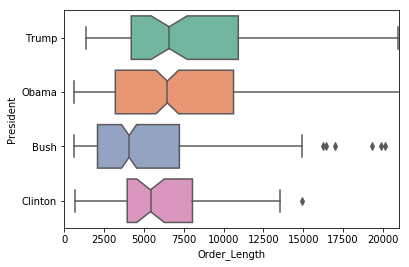

In [257]:
len_box_adj = sns.boxplot(x="Order_Length", y = "President", data = cleaned_ex_data, palette = "Set2", notch = True)

# I'm adjusting the x axis here to make the plot easier to see
plt.xlim(0, 21000)

It appears that the only president with significantly shorter executive orders is Bush. This likely explains why orders by Republicans appear to be much shorter. Next let's see how the length of all orders changed over time

In [260]:
# we need to change the date to a datetime object
cleaned_ex_data["publication_date"] = pd.to_datetime(cleaned_ex_data["publication_date"])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


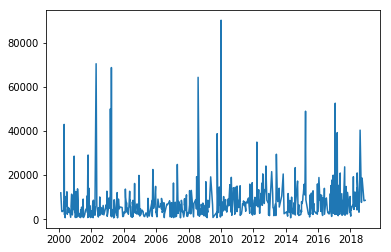

In [261]:
plt.plot(cleaned_ex_data["publication_date"], cleaned_ex_data["Order_Length"])

We can see several spikes here, probably from unusually long orders, but there doesn't appear to be any kind of trend persisting over time. We can also only look at the data below 21000, which is where we limited the boxplots

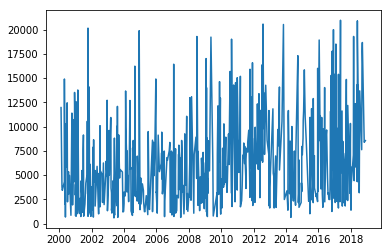

In [262]:
smaller_data = cleaned_ex_data[cleaned_ex_data["Order_Length"] < 21000]

plt.plot(smaller_data["publication_date"], smaller_data["Order_Length"])

Here we can see a possible positive trend, so let's do a linear regression to see if it's a positive trend and calculate pearson's r to see if it's significant

In [265]:
import datetime as dt

date_graph_data = cleaned_ex_data

date_graph_data["publication_date"]=date_graph_data["publication_date"].map(dt.datetime.toordinal)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [268]:
import statsmodels.api as sm

X = date_graph_data["publication_date"]
y = date_graph_data["Order_Length"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Order_Length   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.66e-92
Time:                        05:03:31   Log-Likelihood:                -7339.9
No. Observations:                 705   AIC:                         1.468e+04
Df Residuals:                     704   BIC:                         1.469e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
publication_date     0.0098      0.000     23.833      0.000       0.009       0.011
==============================================================================
Omnibus:                      721.562   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35092.988
Skew:                           4.744   Prob(JB):                         0.00
Kurtosis:                      36.236   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Okay, so we can see that while we have a medium sized R-sq of 0.447, the coefficient of publication date is just 0.0098, which is quite small. Let's try this with the less extreme data

In [269]:
date_graph_data2 = smaller_data

date_graph_data2["publication_date"]=date_graph_data2["publication_date"].map(dt.datetime.toordinal)

X2 = date_graph_data2["publication_date"]
y2 = date_graph_data2["Order_Length"]

model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Order_Length   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1366.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          4.52e-165
Time:                        05:05:47   Log-Likelihood:                -6703.5
No. Observations:                 684   AIC:                         1.341e+04
Df Residuals:                     683   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
publication_date     0.0084      0.000     36.956      0.000       0.008       0.009
==============================================================================
Omnibus:                      109.254   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.503
Skew:                           1.107   Prob(JB):                     8.51e-36
Kurtosis:                       3.876   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have a higher R-sq, but still quite a small coeff for publication date. It's safe to say that the mean lengths of the executive orders haven't gone up over the years (or at least not much)

In [270]:
# if the coefficient is calculated per day, this means that the average executive order length 
# goes up about 3 characters a year. Likely not a clinically significant difference, especially given our limited data
0.0084*365

3.066